In [2]:
from visualization import img_generator
# from utils import * 
from inference import process_img, process_wsi, load_model

import os 
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch

In [3]:
root_img = '/data1/GAP/wsi'
root_mask = '/data1/GAP/Label'
file_list = os.listdir(root_img)
path_img_list = [os.path.join(root_img, file) for file in file_list]
path_mask_list = [os.path.join(root_mask, file.replace('.jpg', '_L.jpg')) for file in file_list]
save_root = '/home/lthpc/zhongzh/RFD4Hist/visualization/inference/'

In [4]:
model_root = '/home/lthpc/zhongzh/RFD4Hist/save/models'
model_path = '/home/lthpc/zhongzh/RFD4Hist/save/student_model/S:MobileNetV2_T:resnet32x4_ivygap_md_relation_pyr_r:1.0_a:0.0_b:0.7_1/ckpt_epoch_120.pth'
# if model_path.split('/')[-2].startswith('S:'):
#     model_name = model_path.split('/')[-2].split('_')[0].split(':')[-1]
# else:
#     model_name = None
save_root = '/home/lthpc/zhongzh/RFD4Hist/save/inference'
n_cls = 8
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = load_model(model_path, n_cls)
model.to(device)
save_path = os.path.join(save_root, model_path.split('/')[-2])
save_img_path = save_path.replace('inference', 'figrues')
if not os.path.exists(save_path):
    os.makedirs(save_path)
if not os.path.exists(save_img_path):
    os.makedirs(save_img_path)

cuda:0
==> loading teacher model
6 0.5
==> done


In [5]:
i = 1

In [6]:

img_path = path_img_list[i]
img_name = img_path.split('/')[-1].replace('.jpg', '')
df = process_img(img_path, model, device, batch_size=128)
df.to_csv(os.path.join(save_path, f'{img_name}.csv'), index=False)

100%|██████████| 94/94 [00:04<00:00, 18.91it/s]


12000it [00:08, 1477.50it/s]


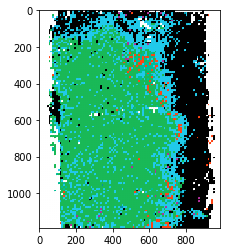

In [5]:
patch_gen = img_generator(df)
fig, ax = patch_gen.segmentation(os.path.join(save_img_path, f'{img_name}.svg'))
# plt.show()

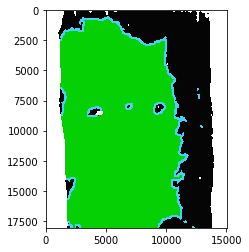

In [5]:
wsi_mask = cv2.imread(path_mask_list[i])
wsi_mask = cv2.cvtColor(wsi_mask, cv2.COLOR_BGR2RGB)
plt.imshow(wsi_mask)
plt.show()